# Autograd

In [1]:
import torch

In [2]:
x = torch.ones(1)
x.requires_grad #기울기를 구할 필요가 있는 변수인가?

False

In [19]:
y = torch.ones(1)
print(y)
y.requires_grad

tensor([1.])


False

In [4]:
z = x + y
z.requires_grad

False

In [5]:
x.requires_grad_()
x.requires_grad

True

In [20]:
y = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32, requires_grad=True)
y

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [7]:
z = 2*y + 1
z

tensor([[3., 5.],
        [7., 9.]], grad_fn=<AddBackward0>)

In [14]:
print("y.requires_grad :", y.requires_grad)
print("z.requires_grad :", z.requires_grad)

print("")

print("y.grad :", y.grad) # y의 기울기는 몇인가??
print("z.grad :", z.grad)

print("")

print("y.grad_fn :", y.grad_fn)# y의 가장 바로 앞 연산(Backward의 연산)은 뭔가?
print("z.grad_fn :", z.grad_fn)

y.requires_grad : True
z.requires_grad : True

y.grad : None
z.grad : None

y.grad_fn : None
z.grad_fn : <AddBackward0 object at 0x1130986a0>


In [16]:
print(z)
z.backward() #스칼라가 아니기 때문에 에러

tensor([[3., 5.],
        [7., 9.]], grad_fn=<AddBackward0>)


RuntimeError: grad can be implicitly created only for scalar outputs

In [24]:
out = z.sum()
out

tensor(24., grad_fn=<SumBackward0>)

In [25]:
#손실함수의 변화를 fix시킴
out.backward(retain_graph=True) #retain_graph 는 결과에 계속 더하라는 뜻
y.grad

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [22]:
y.grad.zero_() #초기화
out.backward()
y.grad

AttributeError: 'NoneType' object has no attribute 'zero_'

# Linear Regression

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim #경사하강법 method

In [3]:
import matplotlib.pyplot as plt

## Define Model with nn.Linear, Optim

In [4]:
x_data = torch.Tensor([1, 2, 3, 4, 5])
y_data = torch.Tensor([2, 4, 6, 8, 10])

x = x_data.view(5, 1)
y = y_data.view(5, 1)

print("x :", x)
print("y :", y)

x : tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
y : tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])


In [5]:
model = nn.Linear(1, 1, bias=False) # y = w*xz
model.weight

Parameter containing:
tensor([[-0.4608]], requires_grad=True)

In [6]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) #model 의 모든 가중치에 다 해당됨

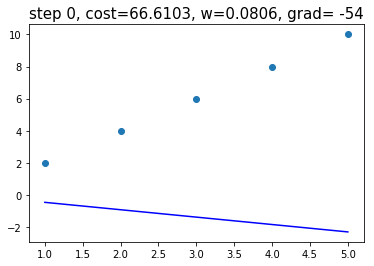

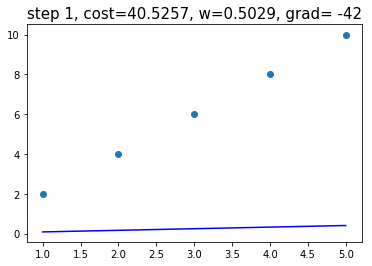

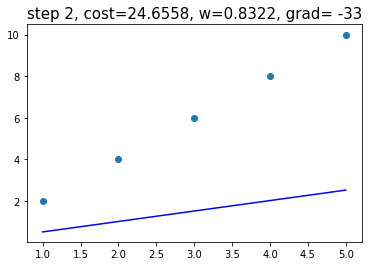

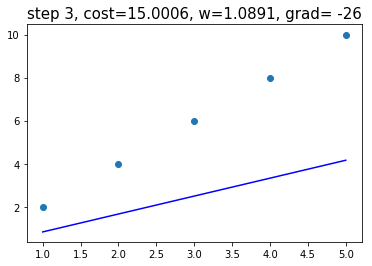

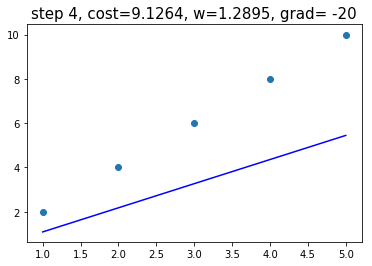

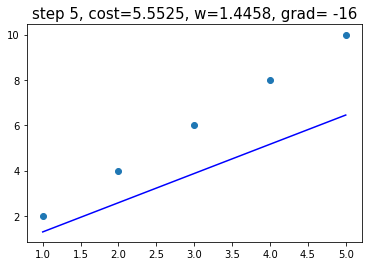

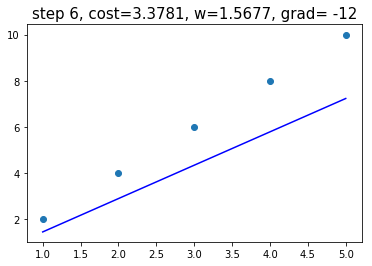

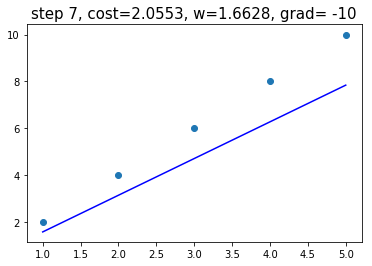

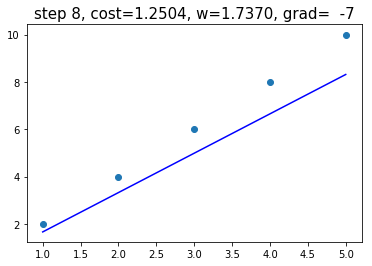

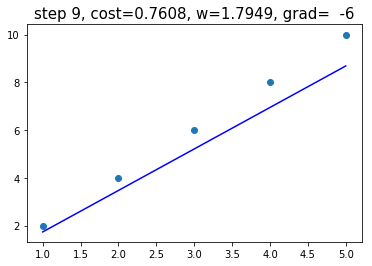

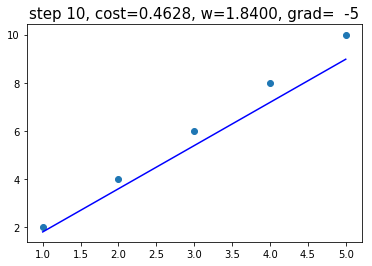

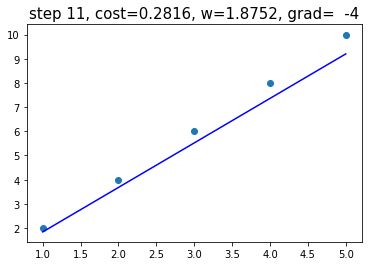

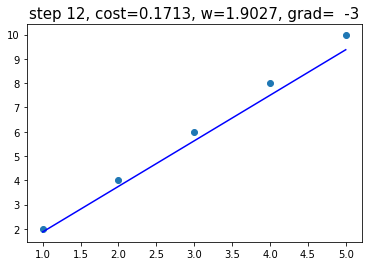

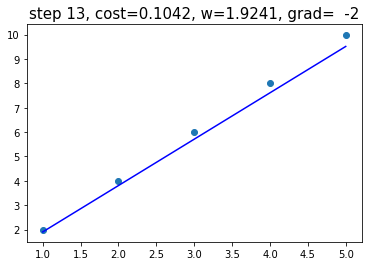

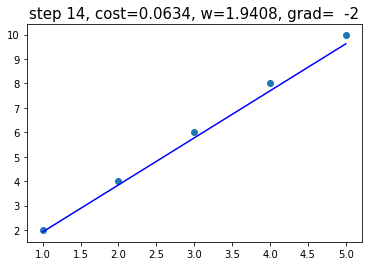

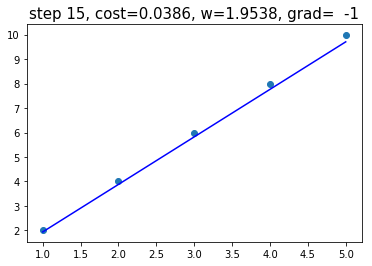

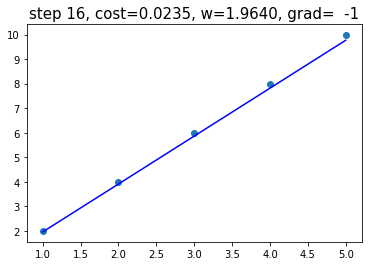

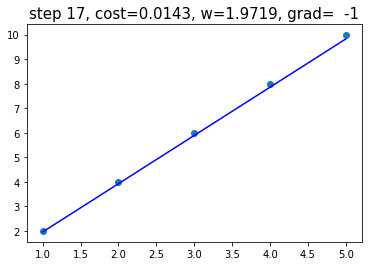

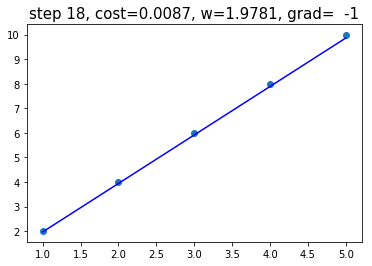

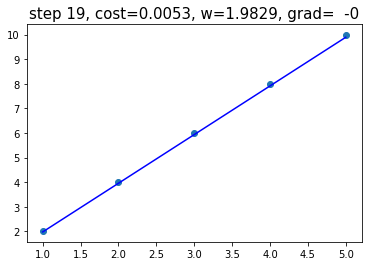

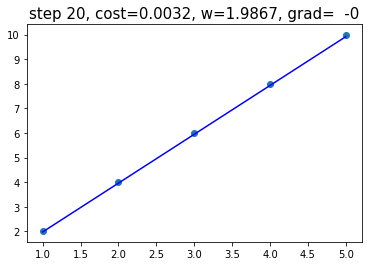

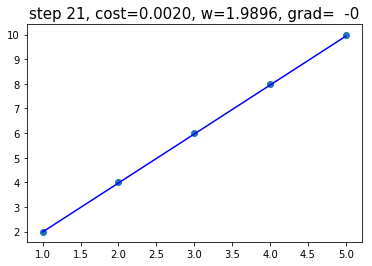

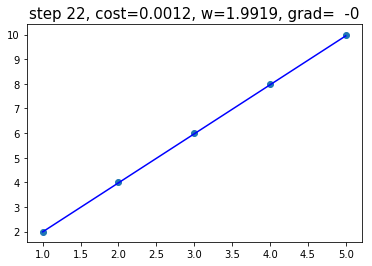

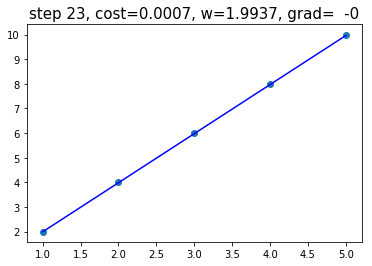

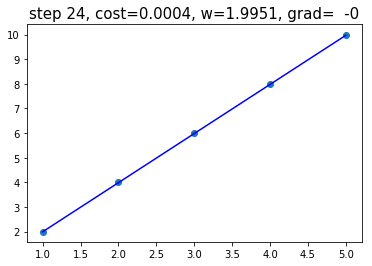

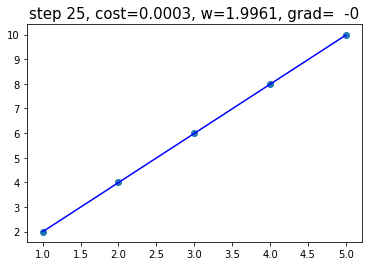

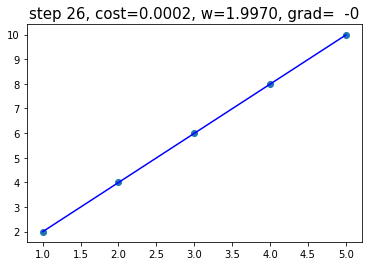

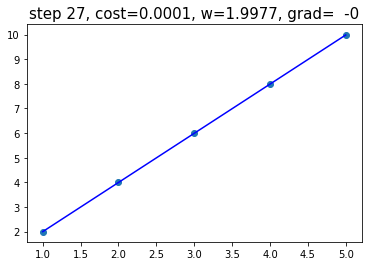

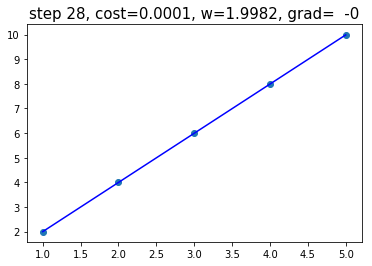

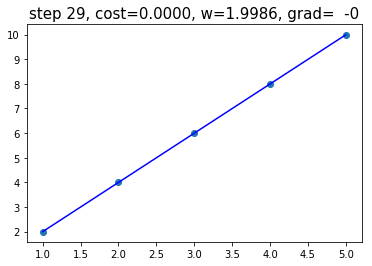

In [7]:
for step in range(30):
    pre = model(x)
    cost = loss(pre, y) #loss(예측값, 실제값)
    
    optimizer.zero_grad() #초기화
    cost.backward() #역전파
    optimizer.step() #설정한 step(30)만큼 시행
    
    if step % 1 == 0:
        plt.scatter(x.numpy(), y.numpy())
        # grad를 가진 tensor는 numpy()를 바로 사용할 수 없음
        # RuntimeError: Can't call numpy() on Variable that requires grad.
        plt.plot(x.numpy(), pre.data.numpy(), 'b-')
        plt.title('step %d, cost=%.4f, w=%.4f, grad=%4.f' 
                  % (step, cost.item() ,model.weight.item(), model.weight.grad.item()), fontdict={'size':15})
        plt.show()

In [39]:
x_new = torch.Tensor([6])
y_new = model(x_new)
y_new.item()

11.995453834533691

## Multivariate Linear Model

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt

### 4.1 Prepare Data
@Solubility Data

Tetko et al. (2001) and Huuskonen (2000) investigated a set of compounds with corresponding experimental solubility values using complex sets of descriptors. They used linear regression and neural network models to estimate the relationship between chemical structure and solubility. For our analyses, we will use 1267 compounds and a set of more understandable descriptors that fall into one of three groups: 208 binary "fingerprints" that indicate the presence or absence of a particular chemical sub-structure, 16 count descriptors (such as the number of bonds or the number of Bromine atoms) and 4 continuous descriptors (such as molecular weight or surface area).

1267 observation (951+316)

228 mixed variables

www.rdocumentation.org/packages/AppliedPredictiveModeling/versions/1.1-6/topics/solubility

In [8]:
import pandas as pd

In [9]:
data = {}
f_list = ["solTestX", "solTestY", "solTrainX", "solTrainY"]

for i in f_list :
    data[i] = pd.read_csv("./data/"+i+".csv", index_col=0)
    
print("Data Loaded")

Data Loaded


In [10]:
train_data = data["solTrainX"]
train_label = data["solTrainY"]
test_data = data["solTestX"]
test_label = data["solTestY"]

print("train data : ", train_data.shape)
print("train label : ", train_label.shape)
print("test data : ", test_data.shape)
print("test label : ", test_label.shape)

arr = train_data.columns

train data :  (951, 228)
train label :  (951, 1)
test data :  (316, 228)
test label :  (316, 1)


In [11]:
data["solTestX"].head()

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
20,1,0,0,1,0,0,0,0,1,1,...,1.301297,0.000000,1.098612,0.0,0.375,0.375,0.000000,0.416563,8.245324,8.245324
21,1,0,1,1,0,1,0,0,0,0,...,1.719055,0.456826,1.098612,0.0,0.000,0.000,0.000000,0.915006,9.765805,9.765805
23,0,1,0,0,1,0,0,0,0,1,...,2.642633,0.000000,1.098612,0.0,0.000,0.000,0.693147,0.652185,8.591537,8.591537
25,0,0,1,0,0,1,0,0,0,0,...,2.372566,0.584815,0.000000,0.0,0.000,0.000,0.693147,0.734273,6.568437,6.568437
28,1,1,0,1,1,1,0,1,0,0,...,2.642633,0.584815,0.693147,0.0,0.000,0.000,0.693147,0.650346,10.095894,10.095894


In [12]:
#Tensor 변환
x, y = torch.from_numpy(train_data.values).float(), torch.from_numpy(train_label.values).float()
x, y

(tensor([[ 0.0000,  1.0000,  0.0000,  ..., -1.6065,  6.8125,  6.8125],
         [ 0.0000,  1.0000,  0.0000,  ..., -0.4413,  9.7538, 12.0296],
         [ 1.0000,  1.0000,  1.0000,  ..., -0.3849,  8.2453,  8.2453],
         ...,
         [ 1.0000,  0.0000,  1.0000,  ..., -1.4838,  5.4565,  5.4565],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.5332,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  1.0000,  ..., -1.3834,  3.8371,  3.8371]]),
 tensor([[-3.9700e+00],
         [-3.9800e+00],
         [-3.9900e+00],
         [-4.0000e+00],
         [-4.0600e+00],
         [-4.0800e+00],
         [-4.0800e+00],
         [-4.1000e+00],
         [-4.1000e+00],
         [-4.1100e+00],
         [-4.1100e+00],
         [-4.1200e+00],
         [-4.1400e+00],
         [-4.1400e+00],
         [-4.1500e+00],
         [-4.1600e+00],
         [-4.1600e+00],
         [-4.1600e+00],
         [-4.1600e+00],
         [-4.1700e+00],
         [-4.1800e+00],
         [-4.1900e+00],
         [-4.1900e+00],
      

In [13]:
x.shape, y.shape

(torch.Size([951, 228]), torch.Size([951, 1]))

### define model

In [14]:
#define model
model = nn.Linear(228, 1, bias=True)
print(model)

Linear(in_features=228, out_features=1, bias=True)


In [15]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-5)

In [16]:
model.parameters() #여기에 b와 모든 w가 담겨있음

<generator object Module.parameters at 0x12321e990>

### Train

In [17]:
for step in range(50000):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 5000 == 0:
        print("step : ", step, ", Cost : ", cost.item())

step :  0 , Cost :  15.261351585388184
step :  5000 , Cost :  1.8189500570297241
step :  10000 , Cost :  1.5334362983703613
step :  15000 , Cost :  1.3954675197601318
step :  20000 , Cost :  1.2846189737319946
step :  25000 , Cost :  1.1926077604293823
step :  30000 , Cost :  1.1154286861419678
step :  35000 , Cost :  1.0501526594161987
step :  40000 , Cost :  0.9945313930511475
step :  45000 , Cost :  0.9467973709106445


In [13]:
model.state_dict()

OrderedDict([('weight',
              tensor([[-1.5220e-02,  5.4661e-03, -7.5901e-02,  5.9633e-02, -9.3260e-03,
                        7.7705e-04,  5.5800e-02, -1.2453e-02, -1.0586e-01, -4.6501e-02,
                       -3.4934e-02, -3.3958e-02, -6.3101e-02, -5.7922e-02,  6.6191e-02,
                        5.8377e-02,  1.6090e-02,  3.8712e-02, -5.3564e-03,  1.7046e-02,
                       -8.9585e-02, -5.4877e-02,  4.1866e-03,  7.2017e-02, -1.9086e-02,
                        4.1681e-02,  2.9810e-02, -1.8628e-02,  1.2543e-02,  3.7245e-02,
                        5.8085e-02,  1.4941e-02,  4.2828e-02,  1.3146e-02,  1.1947e-02,
                       -3.8893e-03,  1.6036e-02,  4.2089e-02, -1.9244e-02,  8.0873e-02,
                       -2.0455e-02,  1.6977e-03,  6.3959e-02, -2.3937e-02,  5.4883e-02,
                        9.0871e-02,  2.9958e-03, -3.3778e-02,  3.5615e-02, -7.7182e-02,
                       -5.3188e-02,  6.1476e-02, -8.1366e-03,  3.1602e-02,  3.1895e-02,
        

### Test

In [14]:
# 숙제

## Logistic Regression